In [1]:
import numpy             as np
import matplotlib.pyplot as plt

import helpers.model as model
model.setup_defaults()

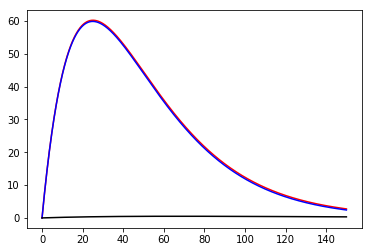

In [2]:
xp = np.linspace(model.range_x1, model.range_x2, 1000)
yp_bkg = model.n_bkg * model.bkg_pdf(xp)
yp_sig = model.n_sig * model.sig_pdf(xp)
yp_tot = model.n_tot * model.pdf(xp)

plt.plot(xp, yp_tot, "-", c="red")
plt.plot(xp, yp_bkg, "-", c="blue")
plt.plot(xp, yp_sig, "-", c="black")
plt.show()

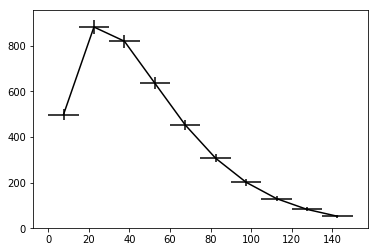

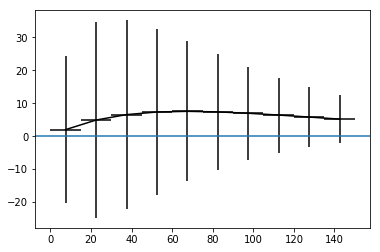

In [3]:
hist_tot_errs = np.sqrt(model.hist_tot)

plt.errorbar(model.bin_centers, model.hist_tot, yerr=hist_tot_errs, xerr=model.bin_xerrs, c="black")
plt.show()

plt.errorbar(model.bin_centers, model.hist_tot - model.hist_bkg, yerr=hist_tot_errs, xerr=model.bin_xerrs, c="black")
plt.axhline(0)
plt.show()

In [4]:
toys = model.generate_toys(1000)
pulls, residuals = [], []
for toy in toys :
    fit   = model.do_fit(toy)
    res = fit.values['s'] - model.n_sig
    if res > 0 : pull = -1. * res / fit.get_param_states().merrors['s'].lower
    else       : pull = res / fit.get_param_states().merrors['s'].upper
    pulls.append(pull)
    residuals.append(res)

In [5]:
print(f"PULLS MEAN = {np.mean(pulls):.4f}  +/-  {np.mean(pulls)/np.sqrt(len(pulls)):.4f}")
print(f"PULLS STD  = {np.std(pulls):.4f}")
print("")
print(f"N_SIG          = {model.n_sig}")
print(f"RESIDUALS MEAN = {np.mean(residuals):.4f}  +/-  {np.mean(residuals)/np.sqrt(len(residuals)):.4f}")
print(f"RESIDUALS STD  = {np.std(residuals):.4f}")

PULLS MEAN = -0.0582  +/-  -0.0018
PULLS STD  = 1.0247

N_SIG          = 60.0
RESIDUALS MEAN = -2.9947  +/-  -0.0947
RESIDUALS STD  = 58.3143
